In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import json
import altair as alt

In [28]:
os.listdir('data/')

['issues_1.json',
 'NB_issues.csv',
 'DS_issues.csv',
 'issues_0.json',
 'DA_issues.csv',
 'issues_4.json',
 'all_repos.csv',
 'simple_all_repo_issues.csv',
 'issues_3.json',
 'issues_2.json']

## Data Science Repo

In [3]:
ds = pd.read_csv('data/DS_issues.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
Unnamed: 0                  500 non-null int64
active_lock_reason          0 non-null float64
assignee                    297 non-null object
assignees                   500 non-null object
author_association          500 non-null object
body                        485 non-null object
closed_at                   500 non-null object
comments                    500 non-null int64
comments_url                500 non-null object
created_at                  500 non-null int64
events_url                  500 non-null object
html_url                    500 non-null object
id                          500 non-null int64
labels                      500 non-null object
labels_url                  500 non-null object
locked                      500 non-null bool
milestone                   0 non-null float64
node_id                     500 non-null object
number                      500 non-nul

In [34]:
da = pd.read_csv('data/DA_issues.csv')
#da.info()

In [7]:
ds.created_at.head()

0    20200817
1    20200816
2    20200815
3    20200814
4    20200814
Name: created_at, dtype: int64

In [9]:
ds['date'] = pd.to_datetime(ds['created_at'], format ='%Y%m%d').dt.date
ds['date'].head()

0    2020-08-17
1    2020-08-16
2    2020-08-15
3    2020-08-14
4    2020-08-14
Name: date, dtype: object

In [18]:
ds1 = ds.groupby(ds['date']).size().reset_index(name='Count')
ds1.to_csv('ds-daily-issue-counts.csv', index=False)

In [21]:
ds1

,date,Count
0,2020-03-29,1
1,2020-03-30,3
2,2020-03-31,7
3,2020-04-01,7
4,2020-04-02,4
...,...,...
121,2020-08-13,2
122,2020-08-14,4
123,2020-08-15,2
124,2020-08-16,2


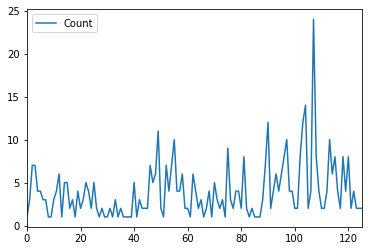

In [23]:
ds1.plot()

## Data Analytics Repo

In [19]:
da['date'] = pd.to_datetime(da['created_at'], format ='%Y%m%d').dt.date
da1 = da.groupby(da['date']).size().reset_index(name='Count')
da1.to_csv('da-daily-issue-counts.csv', index=False)

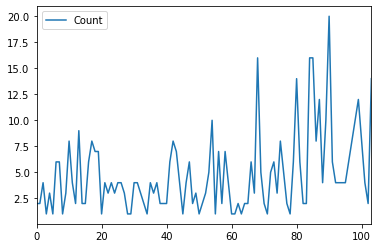

In [24]:
da1.plot()

## Notebooks Repo

In [25]:
nb = pd.read_csv('data/NB_issues.csv')
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 27 columns):
Unnamed: 0                  259 non-null int64
url                         259 non-null object
repository_url              259 non-null object
labels_url                  259 non-null object
comments_url                259 non-null object
events_url                  259 non-null object
html_url                    259 non-null object
id                          259 non-null int64
node_id                     259 non-null object
number                      259 non-null int64
title                       259 non-null object
user                        259 non-null object
labels                      259 non-null object
state                       259 non-null object
locked                      259 non-null bool
assignee                    8 non-null object
assignees                   259 non-null object
milestone                   0 non-null float64
comments                    259 non-nul

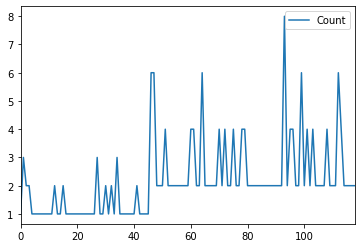

In [26]:
nb['date'] = pd.to_datetime(nb['created_at'], format ='%Y%m%d').dt.date
nb1 = nb.groupby(nb['date']).size().reset_index(name='Count')
nb1.plot()

In [27]:
nb1.to_csv('nb-daily-issue-counts.csv', index=False)

# Three Repos (DS, DA, and Jupyter-NB)

In [29]:
sim = pd.read_csv('data/simple_all_repo_issues.csv')
sim

,created_at,updated_at,closed_at,title,repository_url,number
0,20200812,20200812,20200812,Update random_forest_guided_example.ipynb,https://api.github.com/repos/Thinkful-Ed/jupyt...,159
1,20200807,20200810,20200810,Update model_prep_feature_engineering_2.ipynb,https://api.github.com/repos/Thinkful-Ed/jupyt...,158
2,20200803,20200804,20200804,Closes Thinkful-Ed/data-science#1408,https://api.github.com/repos/Thinkful-Ed/jupyt...,157
3,20200730,20200730,20200730,Fix issue,https://api.github.com/repos/Thinkful-Ed/jupyt...,156
4,20200729,20200729,20200729,Update 6.1.1 Intro to Time.ipynb,https://api.github.com/repos/Thinkful-Ed/jupyt...,155
...,...,...,...,...,...,...
1254,20200625,20200626,20200626,User-submitted feedback for DABC-PYTHON-1,https://api.github.com/repos/Thinkful-Ed/data-...,1187
1255,20200625,20200803,NaT,[Change the SQL ordering] Question from the Ed...,https://api.github.com/repos/Thinkful-Ed/data-...,1186
1256,20200625,20200720,20200720,[Question about SQL and '' in strings] Questi...,https://api.github.com/repos/Thinkful-Ed/data-...,1185
1257,20200625,20200707,NaT,[Question about Tableau aggregations] Questio...,https://api.github.com/repos/Thinkful-Ed/data-...,1184


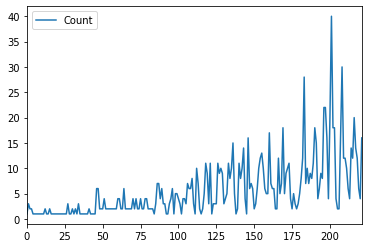

In [30]:
sim['date'] = pd.to_datetime(sim['created_at'], format ='%Y%m%d').dt.date
sim1 = sim.groupby(sim['date']).size().reset_index(name='Count')
sim1.plot()

In [31]:
sim1.to_csv('all3repos-daily-issue-counts.csv', index=False)

In [32]:
sim1.date.min()

datetime.date(2019, 2, 6)

In [33]:
sim1.date.max()

datetime.date(2020, 8, 17)